# sklearn in python

Scikit-learn is a Python module for machine learning built on top of SciPy and distributed under the 3-Clause BSD license. This note will introduce this library briefly.

## Loading a example dataset

First we will load some data to play with.

The data we will use is a very simple flower database known as the Iris dataset.

We have 150 observations of the iris flower specifying some measurements: sepal length, sepal width, petal length and petal width together with its subtype: Iris setosa, Iris versicolor, Iris virginica.

To load the dataset into a Python object:

In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

This data is stored in the .data member, which is a (n_samples, n_features) array.

In [3]:
iris.data.shape

(150L, 4L)

The class of each observation is stored in the .target attribute of the dataset. This is an integer 1D array of length n_samples:

In [4]:
iris.target.shape

(150L,)

In [5]:
import numpy as np

In [6]:
np.unique(iris.target)

array([0, 1, 2])

**An example of reshaping data: the digits dataset**

The digits dataset consists of 1797 images, where each one is an 8x8 pixel image representing a hand-written digit:

In [24]:
digits = datasets.load_digits()

In [25]:
digits.images.shape

(1797L, 8L, 8L)

In [26]:
%matplotlib inline
import pylab as pl

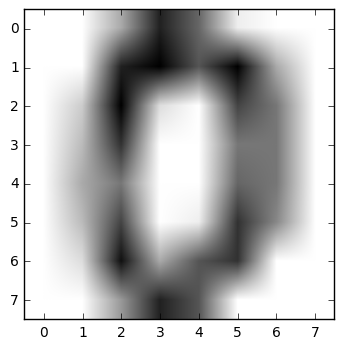

In [27]:
pl.imshow(digits.images[0], cmap=pl.cm.gray_r)

To use this dataset with the scikit, we transform each 8x8 image into a vector of length 64:

In [28]:
data = digits.images.reshape((digits.images.shape[0], -1))

### Learning and Predicting

Now that we’ve got some data, we would like to learn from it and predict on new one. In scikit-learn, we learn from existing data by creating an **estimator** and calling its **fit(X, Y) method**.

In [14]:
from sklearn import svm

In [15]:
clf = svm.LinearSVC()

In [18]:
clf.fit(iris.data, iris.target) #learn from the data

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Once we have learned from the data, we can use our model to predict the most likely outcome on unseen data:

In [19]:
clf.predict([[ 5.0,  3.6,  1.3,  0.25]])

array([0])

**Tip:** We can access the parameters of the model via its attributes ending with an underscore:

In [20]:
clf.coef_

array([[ 0.18423491,  0.45122625, -0.80794267, -0.45071642],
       [ 0.04841295, -0.88826373,  0.40632105, -0.93917214],
       [-0.85061753, -0.98674148,  1.38085485,  1.86542803]])

## Classification

### k-Nearest neighbors classifier

The simplest possible classifier is the nearest neighbor: given a new observation, take the label of the training samples closest to it in n-dimensional space, where n is the number of features in each sample.

The k-nearest neighbors classifier internally uses an algorithm based on ball trees to represent the samples it is trained on.

**KNN (k-nearest neighbors) classification example:**

In [21]:
# Create and fit a nearest-neighbor classifier
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()

In [22]:
knn.fit(iris.data, iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
knn.predict([[0.1, 0.2, 0.3, 0.4]])

array([0])

**Training set and testing set**

When experimenting with learning algorithms, it is important not to test the prediction of an estimator on the data used to fit the estimator. Indeed, with the kNN estimator, we would always get perfect prediction on the training set.

In [24]:
perm = np.random.permutation(iris.target.size)

In [25]:
iris.data = iris.data[perm]

In [26]:
iris.target = iris.target[perm]

In [27]:
knn.fit(iris.data[:100], iris.target[:100])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
knn.score(iris.data[100:], iris.target[100:])

0.93999999999999995

### Support vector machines (SVMs) for classification

#### Linear Support Vector Machines

SVMs try to construct a hyperplane maximizing the margin between the two classes. It selects a subset of the input, called the support vectors, which are the observations closest to the separating hyperplane.

In [30]:
from sklearn import svm

In [31]:
svc = svm.SVC(kernel='linear')

In [32]:
svc.fit(iris.data, iris.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

There are several support vector machine implementations in scikit-learn. The most commonly used ones are **svm.SVC, svm.NuSVC and svm.LinearSVC**; “SVC” stands for Support Vector Classifier (there also exist SVMs for regression, which are called “SVR” in scikit-learn).

#### Using kernels

Classes are not always separable by a hyperplane, so it would be desirable to have a decision function that is not linear but that may be for instance polynomial or exponential:

svc = svm.SVC(kernel='linear') #Linear kernel

svc = svm.SVC(kernel='poly',degree=3) #Polynomial kernel

svc = svm.SVC(kernel='rbf') #RBF kernel (Radial Basis Function)

## Clustering: grouping observations together

Given the iris dataset, if we knew that there were 3 types of iris, but did not have access to their labels, we could try **unsupervised learning**: we could **cluster** the observations into several groups by some criterion.

### K-means clustering

The simplest clustering algorithm is k-means. This divides a set into k clusters, assigning each observation to a cluster so as to minimize the distance of that observation (in n-dimensional space) to the cluster’s mean; the means are then recomputed. This operation is run iteratively until the clusters converge, for a maximum for max_iter rounds.

(An alternative implementation of k-means is available in SciPy’s cluster package. The scikit-learn implementation differs from that by offering an object API and several additional features, including smart initialization.)

In [33]:
from sklearn import cluster, datasets

In [34]:
iris = datasets.load_iris()

In [35]:
k_mearns = cluster.KMeans(n_clusters=3)

In [36]:
k_mearns.fit(iris.data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [37]:
print(k_mearns.labels_[::10])

[1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]


In [38]:
print(iris.target[::10])

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


**Application to Image Compression**

Clustering can be seen as a way of choosing a small number of information from the observations (like a projection on a smaller space). For instance, this can be used to posterize an image (conversion of a continuous gradation of tone to several regions of fewer tones):

In [39]:
from scipy import misc

In [40]:
face = misc.face(gray=True).astype(np.float32)

In [41]:
X = face.reshape((-1, 1))  # We need an (n_sample, n_feature) array

In [42]:
K = k_means = cluster.KMeans(n_clusters=5)  # 5 clusters

In [43]:
k_means.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [44]:
values = k_means.cluster_centers_.squeeze()

In [45]:
labels = k_means.labels_

In [46]:
face_compressed = np.choose(labels, values)

In [47]:
face_compressed.shape = face.shape

## Dimension Reduction with Principal Component Analysis

The cloud of points spanned by the observations above is very flat in one direction, so that one feature can almost be exactly computed using the 2 other. PCA finds the directions in which the data is not flat and it can reduce the dimensionality of the data by projecting on a subspace.

In [48]:
from sklearn import decomposition

In [49]:
pca = decomposition.PCA(n_components=2)

In [50]:
pca.fit(iris.data)

PCA(copy=True, n_components=2, whiten=False)

In [51]:
X = pca.transform(iris.data)

Now we can visualize the (transformed) iris dataset:

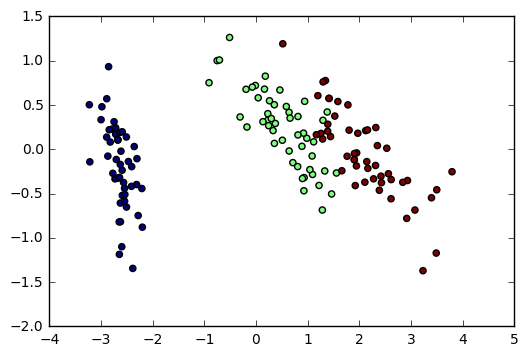

In [52]:
import pylab as pl
pl.scatter(X[:, 0], X[:, 1], c=iris.target)

PCA is not just useful for visualization of high dimensional datasets. It can also be used as a preprocessing step to help speed up supervised methods that are not efficient with high dimensions.

## Putting it all together: face recognition

An example showcasing face recognition using Principal Component Analysis for dimension reduction and Support Vector Machines for classification.

Stripped-down version of the face recognition example:

2017-02-12 23:02:09,924 Loading LFW people faces from C:\Users\Lenovo\scikit_learn_data\lfw_home


Automatically created module for IPython interactive environment
Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Extracting the top 150 eigenfaces from 966 faces
done in 0.558s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.047s
Fitting the classifier to the training set
done in 26.564s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting people's names on the test set
done in 0.049s
                   precision    recall  f1-score   support

     Ariel Sharon       0.57      0.62      0.59        13
     Colin Powell       0.75      0.87      0.81        60
  Donald Rumsfeld       0.74      0.74      0.74        27
    George W Bush       0.88      0.88      0.88       146
Gerhard Schroeder       0.76      0.76      0.7

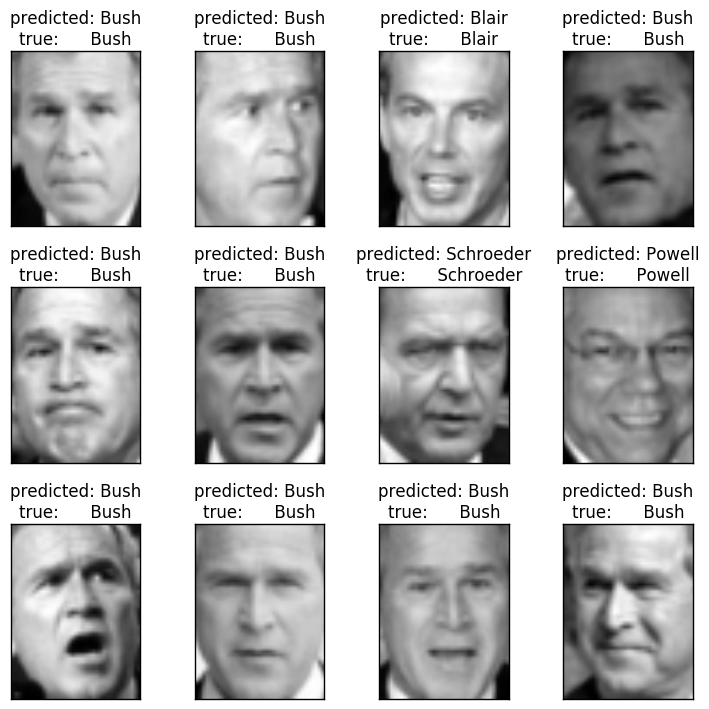

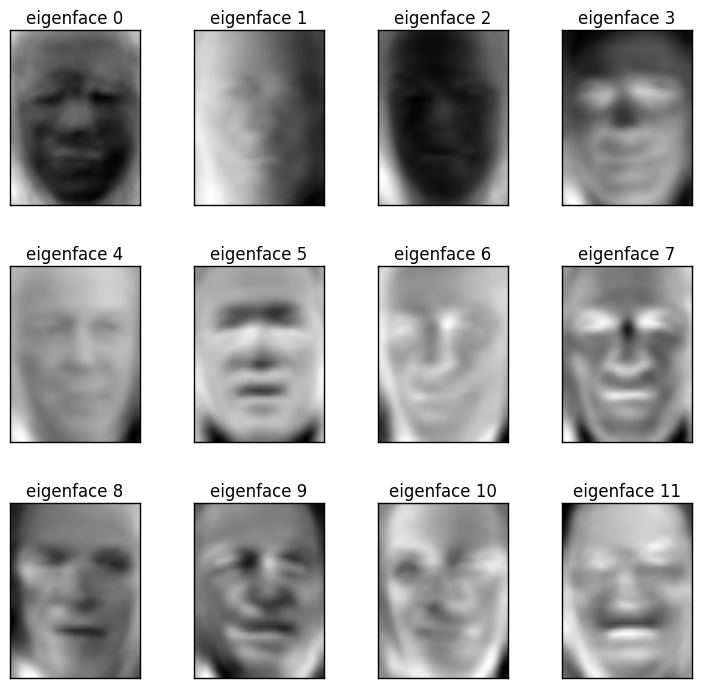

In [1]:
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


###############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


###############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


###############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


###############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


###############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


###############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

## Linear model: from regression to sparsity

**Diabetes dataset**

The diabetes dataset consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year:

In [10]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

The task at hand is to predict disease prediction from physiological variables.

### Sparse models

To improve the conditioning of the problem (uninformative variables, mitigate the curse of dimensionality, as a feature selection preprocessing, etc.), it would be interesting to select only the informative features and set non-informative ones to 0. This penalization approach, called **Lasso**, can set some coefficients to zero. Such methods are called **sparse method**, and sparsity can be seen as an application of Occam’s razor: prefer simpler models to complex ones.

In [11]:
from sklearn import linear_model

In [12]:
regr = linear_model.Lasso(alpha=.3) 

In [13]:
regr.fit(diabetes_X_train, diabetes_y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [14]:
regr.coef_ # very sparse coefficients

array([   0.        ,   -0.        ,  497.34075682,  199.17441034,
         -0.        ,   -0.        , -118.89291545,    0.        ,
        430.9379595 ,    0.        ])

In [15]:
regr.score(diabetes_X_test, diabetes_y_test) 

0.55108354530029779

being the score very similar to linear regression (Least Squares):

In [16]:
lin = linear_model.LinearRegression()
lin.fit(diabetes_X_train, diabetes_y_train) 
lin.score(diabetes_X_test, diabetes_y_test) 

0.58507530226905735

**Different algorithms for a same problem**

Different algorithms can be used to solve the same mathematical problem. For instance the Lasso object in the sklearn solves the lasso regression using a coordinate descent method, that is efficient on large datasets. However, the sklearn also provides the LassoLARS object, using the LARS which is very efficient for problems in which the weight vector estimated is very sparse, that is problems with very few observations.

## Model selection: choosing estimators and their parameters

### Grid-search and cross-validated estimators

***Grid-search***

The scikit-learn provides an object that, given data, computes the score during the fit of an estimator on a parameter grid and chooses the parameters to maximize the cross-validation score. This object takes an estimator during the construction and exposes an estimator API:

In [19]:
import numpy as np
from sklearn import svm, grid_search

In [20]:
gammas = np.logspace(-6, -1, 10)

In [21]:
svc = svm.SVC()

In [22]:
clf = grid_search.GridSearchCV(estimator=svc, param_grid=dict(gamma=gammas),n_jobs=-1)

In [29]:
clf.fit(digits.data[:1000], digits.target[:1000])

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'gamma': array([  1.00000e-06,   3.59381e-06,   1.29155e-05,   4.64159e-05,
         1.66810e-04,   5.99484e-04,   2.15443e-03,   7.74264e-03,
         2.78256e-02,   1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [30]:
clf.best_score_

0.932

In [31]:
clf.best_estimator_.gamma

0.00059948425031894088

By default the GridSearchCV uses a 3-fold cross-validation. However, if it detects that a classifier is passed, rather than a regressor, it uses a stratified 3-fold.

***Cross-validated estimators***

Cross-validation to set a parameter can be done more efficiently on an algorithm-by-algorithm basis. This is why, for certain estimators, the scikit-learn exposes “CV” estimators, that set their parameter automatically by cross-validation:

In [32]:
from sklearn import linear_model, datasets

In [33]:
lasso = linear_model.LassoCV()

In [34]:
diabetes = datasets.load_diabetes()

In [35]:
X_diabetes = diabetes.data

In [36]:
y_diabetes = diabetes.target

In [37]:
lasso.fit(X_diabetes, y_diabetes)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [38]:
lasso.alpha_

0.012291895087486173

These estimators are called similarly to their counterparts, with ‘CV’ appended to their name.

These are just a brief introduce for sklearn, later I am going to introduce the commonly used algorithms in the form of actual combat.